<a href="https://colab.research.google.com/github/bhargav23/AIML-DL-Lab/blob/main/7_VGG16_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**7. Use a pre-trained convolution neural network (VGG16) for image classification**

In [1]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
# --- 1. Load the VGG16 model ---
# Load the VGG16 model pre-trained on the ImageNet dataset.
# 'weights="imagenet"' downloads the pre-trained weights.
print("Loading VGG16 model...")
model = VGG16(weights='imagenet')
print("Model loaded successfully.")

Loading VGG16 model...
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Model loaded successfully.


In [3]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/4/45/A_small_cup_of_coffee.JPG'

In [4]:
# --- 2. Load and Preprocess the Image ---
print(f"Loading image from URL: {image_url}")
# Download the image from the URL
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(image_url, headers=headers)
response.raise_for_status() # Raise an exception for bad status codes
img = Image.open(BytesIO(response.content))

# VGG16 requires input images to be 224x224 pixels.
# We resize the image to this target size.
img_resized = img.resize((224, 224))

# Convert the PIL image to a NumPy array.
# The shape will be (224, 224, 3) for a color image.
img_array = image.img_to_array(img_resized)

# Expand the dimensions of the image array to match the
# input shape expected by the model: (1, 224, 224, 3).
# The '1' represents the batch size.
img_batch = np.expand_dims(img_array, axis=0)

# Preprocess the image for the VGG16 model. This function
# adjusts the pixel values to the format the model was trained on
# (e.g., converting from RGB to BGR and zero-centering with respect
# to the ImageNet dataset).
img_preprocessed = preprocess_input(img_batch)

Loading image from URL: https://upload.wikimedia.org/wikipedia/commons/4/45/A_small_cup_of_coffee.JPG


In [5]:
# --- 3. Make Predictions ---
print("Classifying the image...")
predictions = model.predict(img_preprocessed)

Classifying the image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [6]:
# --- 4. Decode and Display Results ---
# The 'decode_predictions' function converts the raw prediction
# probabilities into a list of human-readable labels from ImageNet.
# 'top=3' means we want the top 3 most likely classes.
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Classification complete.")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Classification complete.


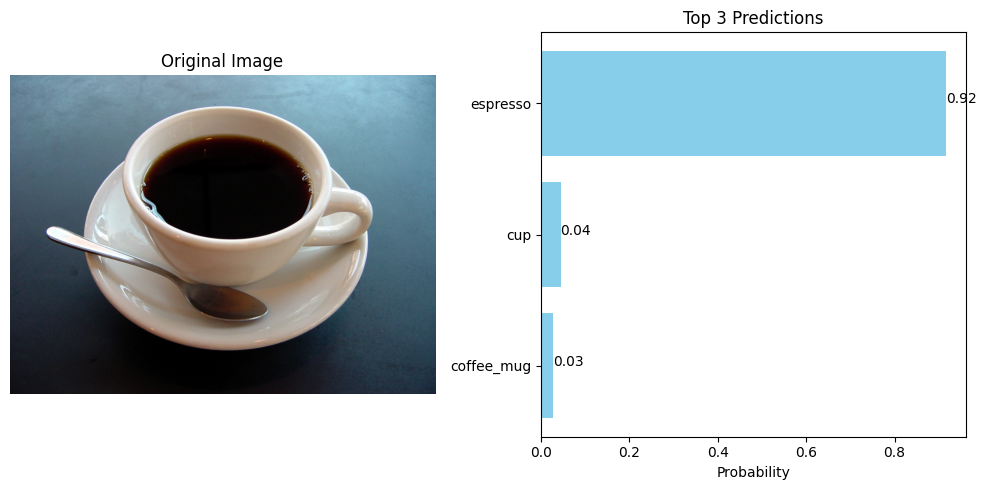


--- Top 3 Predictions ---
1: espresso (91.59%)
2: cup (4.43%)
3: coffee_mug (2.64%)


In [7]:
# --- 5. Display the results ---
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

# Display the predictions
plt.subplot(1, 2, 2)
y_pos = np.arange(len(decoded_predictions))
performance = [pred[2] for pred in decoded_predictions]
class_names = [pred[1] for pred in decoded_predictions]

plt.barh(y_pos, performance, align='center', color='skyblue')
plt.yticks(y_pos, class_names)
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.xlabel('Probability')
plt.title('Top 3 Predictions')

# Add probability values on the bars
for index, value in enumerate(performance):
    plt.text(value, index, f"{value:.2f}")

plt.tight_layout()
plt.show()

print("\n--- Top 3 Predictions ---")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2%})")